In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/My Drive/20191/Hệ CSDL đa phương tiện'
! ls

/content/drive/My Drive/20191/Hệ CSDL đa phương tiện
'BTL CSDL đa phương tiện.gdoc'		        HNSWFlat2.index
'Category and Attribute Prediction Benchmark'   Image
 CNN.ipynb				        Image.pdf
 Code					        img
 Data					        info
 dataset				        lib
 FAISS					        messi1.jpg
 faiss-gpu-1.2.1-py36_cuda9.0.176_1.tar.bz2     messi5.jpg
 faiss-gpu-1.2.1-py36_cuda9.0.176_1.tar.bz2.1   messi.jpg
 faiss-gpu-1.2.1-py36_cuda9.0.176_1.tar.bz2.2   model.h5
 feature.pkl				        Similarity.ipynb


In [3]:
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Conv2DTranspose
from keras.models import Model
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Activation, Lambda, Flatten, concatenate, Reshape
from keras.models import Model
import os
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
class GetDataset:
  
    
  def get_img(self, data_path):
    
    img_size = 256
    im = cv2.imread(data_path)
    im_resized = cv2.resize(im, (img_size,img_size), interpolation=cv2.INTER_LINEAR)

    return im_resized

  
  def get_dataset(self, dataset_path ):
    
    X = []
    
    
    for label in range(1, 201):
        print(label)
       
        data_path = dataset_path + '/' + str(label)
        
        
        for file in range(1, 46):
            if ( file < 10):
              filename = data_path + '/' + 'img_0000000' + str(file) + '.jpg'
            else:
              filename = data_path + '/' + 'img_000000' + str(file) + '.jpg'

            img = self.get_img(filename)
            X.append(img)
            
          
       
        
        
     # Create dateset:
    X = np.array(X).astype('float32')/255.
  
    #Y = to_categorical(Y, 2)
    
    print(X.shape)
  
        
   
    return X
    

In [5]:
dt = GetDataset()

X = dt.get_dataset('/content/drive/My Drive/20191/Hệ CSDL đa phương tiện/dataset')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
(9000, 256, 256, 3)


In [6]:
# About Dataset:
img_size = X.shape[1] 
print('Training shape:', X.shape)
print(X.shape[0], 'sample,',X.shape[1] ,'x',X.shape[2] ,'size RGB image.\n')


Training shape: (9000, 256, 256, 3)
9000 sample, 256 x 256 size RGB image.



In [7]:
#Convolutional Autoencoder
input_img = Input(shape=(256, 256, 3))
def Model_CNN(input_img):
  #encoding
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  encoded = MaxPooling2D((2, 2), padding='same')(x)

  #decoding
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = UpSampling2D((2, 2))(x)
  decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

  autoencoder = Model(input_img, decoded)
  autoencoder.compile(optimizer='adam', loss='mse')

  autoencoder.summary()

  return autoencoder, encoded





Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 16)      4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 8)         

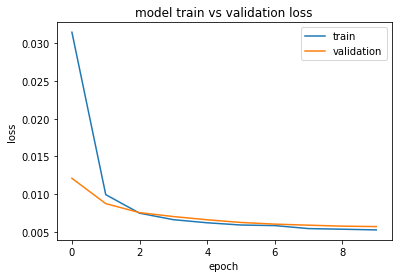

In [8]:
autoencoder,encoded = Model_CNN(input_img)
print(autoencoder.summary())

#data augmentation : sinh ra thêm data
# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     )
# datagen.fit(X)

history2 = autoencoder.fit(X,X,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_split=0.1,
                verbose = 1)

#plot our loss 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:


# use our encoded layer to encode the training input
encoder = Model(input_img, encoded)
#encoded_input = Input(shape=(encoding_dim,))

In [0]:

encoded_data = encoder.predict(X)

In [11]:
print(encoded_data.shape)

(9000, 32, 32, 8)


In [12]:
xb = encoded_data.reshape((-1, np.prod(encoded_data.shape[1]*encoded_data.shape[2]*encoded_data.shape[3])))
d = xb.shape[1]

print(d)

8192


In [13]:
print(xb[0])

[0.3815856  0.7443525  0.84810996 ... 0.71552676 0.         1.2508713 ]


In [0]:
import pickle

with open('features.pkl', 'wb') as f:
    pickle.dump(xb, f)

In [0]:
with open ('features.pkl', 'rb') as f:
    features = pickle.load(f)

In [16]:
print(features.shape)

(9000, 8192)


In [17]:
print(features[0])

[0.3815856  0.7443525  0.84810996 ... 0.71552676 0.         1.2508713 ]


In [0]:
encoder.save('model.h5')